In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_full = pd.read_csv("SpotifyFeatures.csv")
df = df_full[1:1000] 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 1 to 999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             999 non-null    object 
 1   artist_name       999 non-null    object 
 2   track_name        999 non-null    object 
 3   track_id          999 non-null    object 
 4   popularity        999 non-null    int64  
 5   acousticness      999 non-null    float64
 6   danceability      999 non-null    float64
 7   duration_ms       999 non-null    int64  
 8   energy            999 non-null    float64
 9   instrumentalness  999 non-null    float64
 10  key               999 non-null    object 
 11  liveness          999 non-null    float64
 12  loudness          999 non-null    float64
 13  mode              999 non-null    object 
 14  speechiness       999 non-null    float64
 15  tempo             999 non-null    float64
 16  time_signature    999 non-null    object 
 1

In [4]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,25.643644,0.487531,0.551942,2.336452e+05,0.493294,0.039485,0.192238,-9.845289,0.102706,117.531920,0.499553
std,25.494334,0.342848,0.161106,2.512811e+05,0.245990,0.166515,0.145613,4.768770,0.165208,30.392854,0.254767
min,0.000000,0.000029,0.088300,1.880000e+04,0.001540,0.000000,0.023000,-29.368000,0.023200,32.244000,0.000000
25%,0.000000,0.146500,0.459000,1.703050e+05,0.305000,0.000000,0.100000,-12.680000,0.032750,92.121500,0.290500
50%,14.000000,0.506000,0.573000,2.061470e+05,0.502000,0.000000,0.136000,-8.672000,0.042700,116.674000,0.491000
75%,44.000000,0.807000,0.667500,2.397985e+05,0.686500,0.000100,0.244000,-6.230000,0.079200,137.507000,0.706500
max,83.000000,0.995000,0.914000,3.631469e+06,0.976000,0.984000,0.969000,-2.134000,0.961000,205.455000,0.973000


In [5]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.7370,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.1310,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.3260,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.2250,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.749,0.578,160627,0.0948,0.000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358


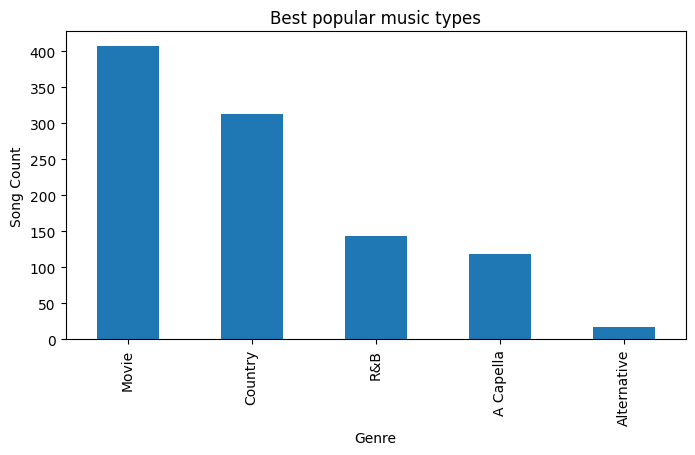

In [6]:
# Genre Distrubiton
df['genre'].value_counts().head(10).plot(kind='bar',figsize=(8,4))
plt.title("Best popular music types")
plt.xlabel("Genre")
plt.ylabel("Song Count")
plt.show()

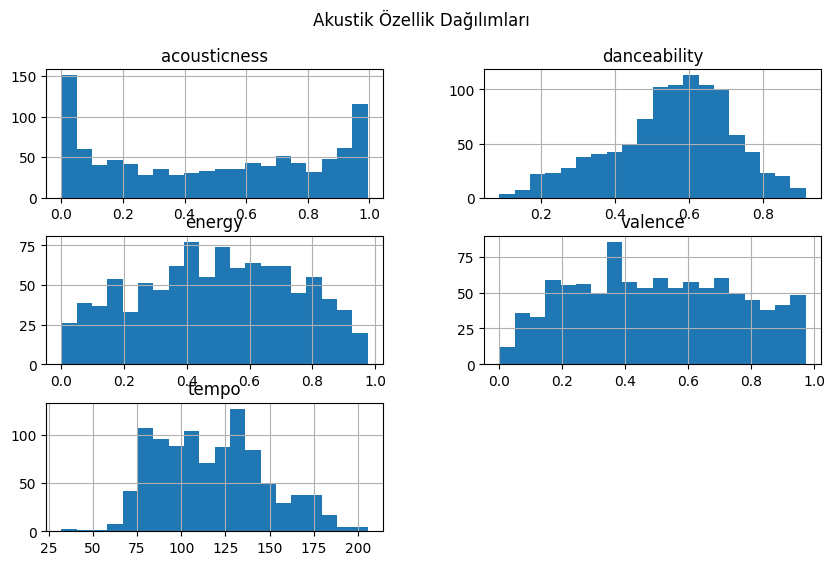

In [7]:
# Distrubution music types
features = ['acousticness', 'danceability', 'energy', 'valence', 'tempo']
df[features].hist(bins=20, figsize=(10,6))
plt.suptitle("Akustik Özellik Dağılımları")
plt.show()

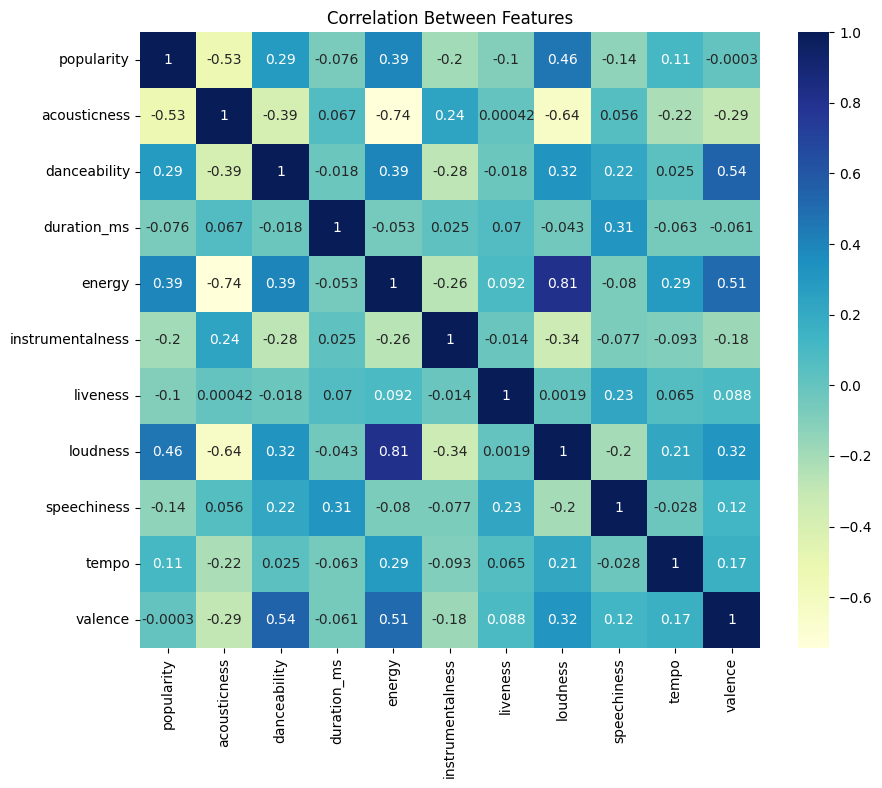

In [11]:
#Feature Relationships
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Correlation Between Features")
plt.show()

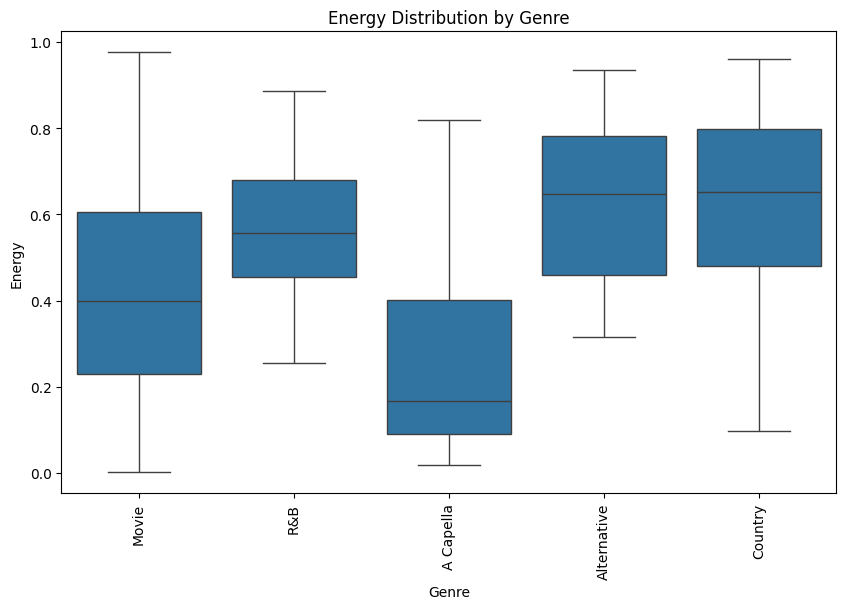

In [15]:
# Genre-based Comparisons
plt.figure(figsize=(10,6))
sns.boxplot(x='genre', y='energy', data=df)
plt.xticks(rotation=90)
plt.title("Energy Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Energy")
plt.show()

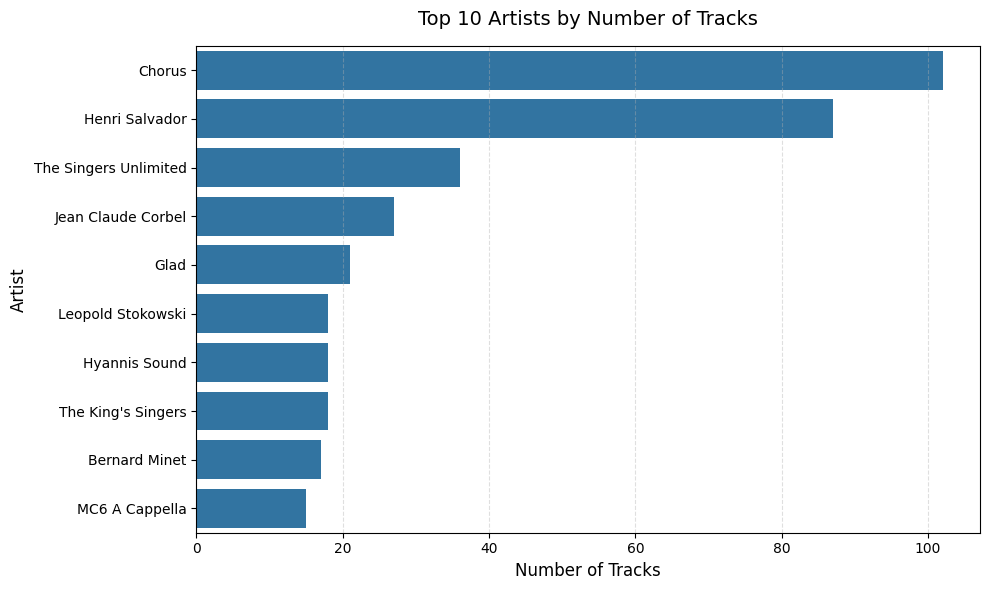

In [14]:
# Find top 10 artists with the most tracks
top_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values, y=top_artists.index)

plt.title("Top 10 Artists by Number of Tracks", fontsize=14, pad=15)
plt.xlabel("Number of Tracks", fontsize=12)
plt.ylabel("Artist", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [16]:
# Recommender System
features = df[['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'loudness']]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(features_scaled)

In [1]:
def recommend_song(song_name, df, similarity_matrix, top_k=5):
    
    song_mask = df['track_name'].str.lower().str.contains(song_name.lower(), na=False)
    
    if not song_mask.any():
        print(f"'{song_name}' not found!")
        return pd.DataFrame()
    
    song_idx = df[song_mask].index[0]
    
    similarities = similarity_matrix[song_idx]
    similar_indices = similarities.argsort()[::-1][1:top_k+1]  
    
    result = df.loc[similar_indices, ['track_name', 'artist_name', 'genre']].copy()
    result['similarity'] = similarities[similar_indices]
    
    return result

In [2]:
song = input("Enter a song name for recommendations: ")
recommend_song(song, df, similarity_matrix)

NameError: name 'df' is not defined

In [25]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.749,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Country,Merle Haggard,I'm A White Boy,6OTt38sxQQ2iyKbUGCjAvs,42,0.743,0.617,124307,0.6640,0.000056,A,0.3090,-10.872,Major,0.0379,100.826,4/4,0.884
996,Country,Josh Turner,Deep South,0MVWxE7RIYMDt8JPC2vLNF,42,0.136,0.790,235800,0.8790,0.001180,C,0.0845,-5.698,Major,0.0371,116.992,4/4,0.963
997,Country,Johnny Cash,Satisfied Mind,4i5U0edk7EZFrgbrV5CiZ6,47,0.902,0.495,168067,0.2430,0.000003,A,0.1460,-11.383,Major,0.0563,141.636,3/4,0.389
998,Country,Brett Eldredge,On And On,0lkte5wif8KIuWYYPw7yZo,42,0.232,0.685,188467,0.5810,0.000000,G#,0.1010,-6.179,Major,0.0456,183.895,4/4,0.718
